# Supervised Learning: Linear Regression

In this section we will be going over linear regression. We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regession methods, check out the wikipedia page (http://en.wikipedia.org/wiki/Linear_regression) and also check out Andrew Ng's wonderful lectures for free on youtube (https://www.youtube.com/watch?v=5u4G23_OohI).

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.

Step 2: Visualizing current data.

Step 3: The mathematics behind the Least Squares Method.

Step 4: Using Numpy for a Univariate Linear Regression.

Step 5: Getting the error.

Step 6: Using scikit learn to implement a multivariate regression.

Step 7: Using Training and Validation.

Step 8: Predicting Prices

Step 9 : Residual Plots

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Now import dataset from scikit learn as well as the linear_model module. Note: You may have to run a download, scikit learn will read an error and prompt you to if you don't have the datasets.

In [3]:
from sklearn.datasets import load_boston


In [4]:
# Load the housing dataset
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Step 2: Visualizing current data
You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.


Text(0,0.5,'Number of houses')

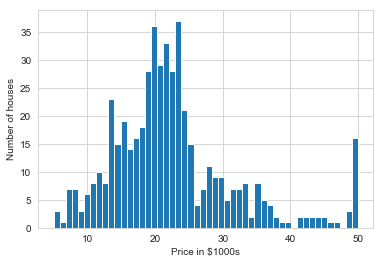

In [8]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Interesting, now let's see a scatter plot of one feature, versus the target. In this case we'll use the housing price versus the number of rooms in the dwelling.

Text(0.5,0,'Number of rooms')

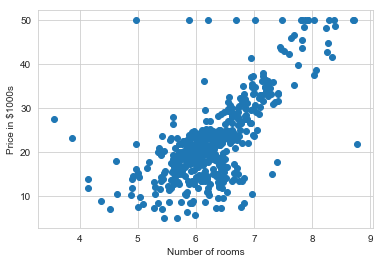

In [9]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

Great! Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

In [11]:
print type(boston)


<class 'sklearn.utils.Bunch'>


1.) Use pandas to transform the boston dataset into a DataFrame:

2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [14]:
# reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now let's add the target of the boston data set, the price. We'll create a new column in our DataFrame.



In [15]:
# Set price column for target
boston_df['Price'] = boston.target

In [16]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


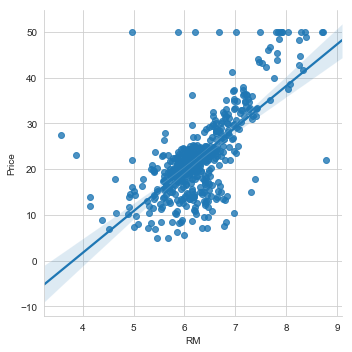

In [17]:
# Using seabron to create a linear fit
sns.lmplot('RM','Price',data = boston_df)

However, we won't be able to do this when we move to more complicated regression models, so we'll stay focused on using the scikit learn library!

# Step 3: The mathematics behind the Least Squares Method.
In this particular lecture we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

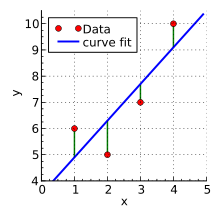

In [25]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)


Now as before, we're labeling each green line as having a distance D, and each red point as having a coordinate of (X,Y). Then we can define our best fit line as the line having the property were: $$ D_{1}^2 + D_{2}^2 + D_{3}^2 + D_{4}^2 + ....+ D_{N}^2$$

So how do we find this line? The least-square line approximating the set of points:

$$ (X,Y)_{1},(X,Y)_{2},(X,Y)_{3},(X,Y)_{4},(X,Y)_{5}, $$
has the equation: $$ Y = a_{0} +a_{1}X $$ this is basically just a rewritten form of the standard equation for a line: $$Y=mx+b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations: $$ \Sigma Y = a_{0}N + a_{1}\Sigma X $$$$ \Sigma XY = a_{0}\Sigma X + a_{1}\Sigma X^2 $$

These are called the normal equations for the least squares line. There are further steps that can be taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this great video.

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the power of scikit learn to do a full multivariate linear regression.

## Step 4: Using Numpy for a Univariate Linear Regression
Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [22]:
# Set up X as median room values
X = boston_df.RM

X.head()

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64

Houston we are go!
